data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# IMPORT DATA AND PERFORM EXPLORATORY DATA ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import string

import nltk # Natural Language tool kit 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<AxesSubplot:xlabel='rating', ylabel='count'>

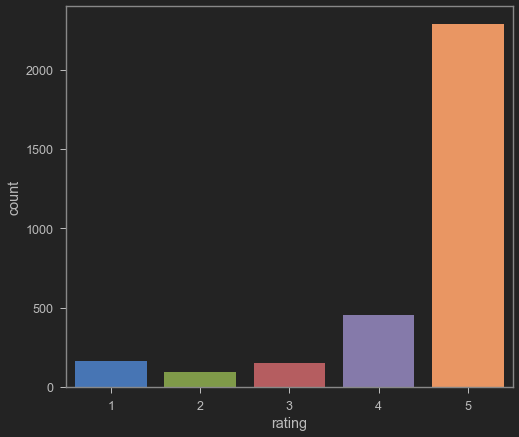

In [5]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating']) 

In [6]:
verified_reviews_length = reviews_df['verified_reviews'].apply(len)
verified_reviews_length

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: verified_reviews, Length: 3150, dtype: int64

In [7]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [8]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

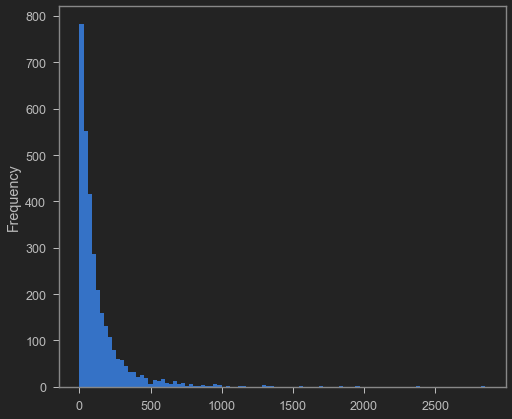

In [9]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist') 

In [10]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<AxesSubplot:xlabel='feedback', ylabel='count'>

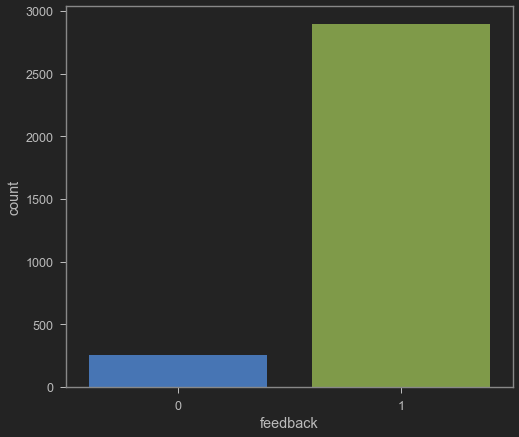

In [11]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

# PLOT WORDCLOUD

In [12]:
# obtain only positive reviews

positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [13]:
# obtain negative reviews
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [14]:
# convert positive verified_reviews to list
sentences = positive['verified_reviews'].to_list()
len(sentences)

2893

In [15]:
# join all reviews to one large string
sentences_as_one_string = "".join(sentences)

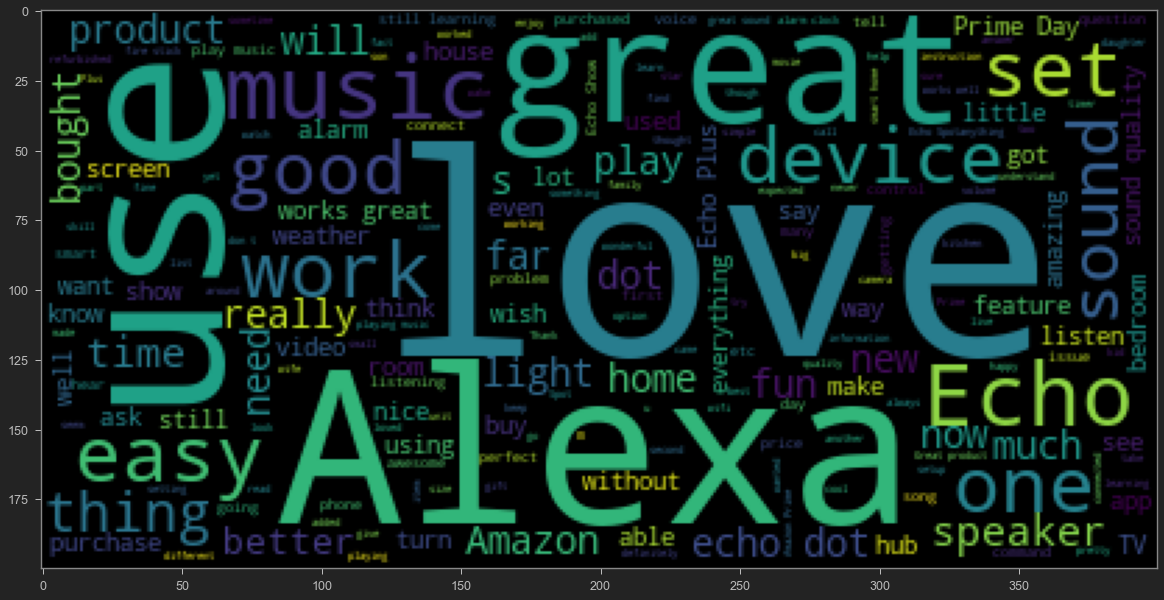

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

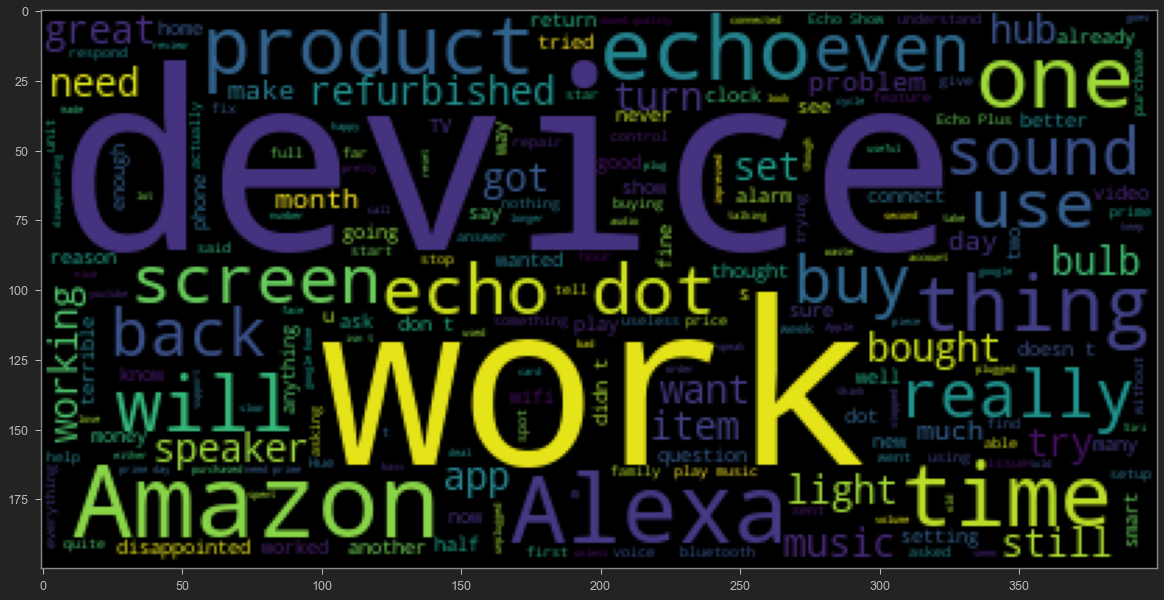

In [17]:
negative_list = negative['verified_reviews']

negative_sentences_as_one_string = "".join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# PERFORM DATA CLEANING 

In [18]:
def message_cleaning(message):
    '''
    This function defines a pipeline.
    The pipeline performs the following:
        (1) remove punctuation, 
        (2) remove stopwords
    '''
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [19]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [20]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

# show the cleaned up version
print(reviews_df_clean[5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [21]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [22]:
# print(vectorizer.get_feature_names())

# print(reviews_countvectorizer.toarray())  

In [23]:
reviews_countvectorizer.shape

(3150, 5211)

In [24]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [25]:
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# TRAIN AND TEST AI/ML MODELS

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.57      0.25      0.35        51
           1       0.94      0.98      0.96       579

    accuracy                           0.92       630
   macro avg       0.75      0.62      0.66       630
weighted avg       0.91      0.92      0.91       630



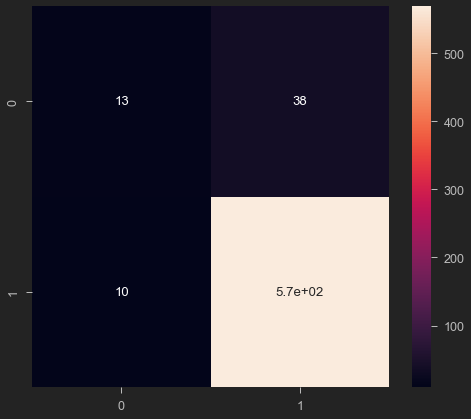

In [28]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predict_test = nb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

Logistic Regression

              precision    recall  f1-score   support

           0       0.70      0.27      0.39        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.82      0.63      0.68       630
weighted avg       0.92      0.93      0.92       630



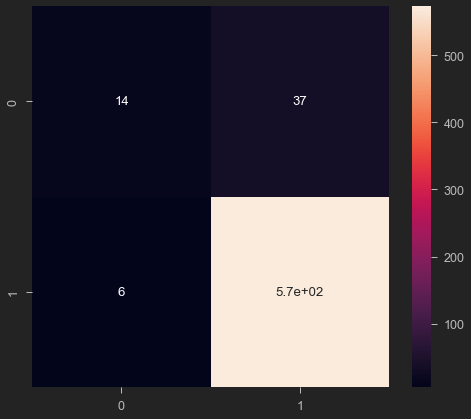

In [29]:
from distutils.log import Log


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict_test = lr.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

XGBoosot

              precision    recall  f1-score   support

           0       0.70      0.27      0.39        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.82      0.63      0.68       630
weighted avg       0.92      0.93      0.92       630



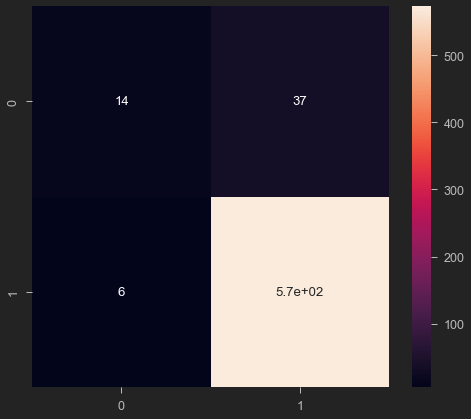

In [30]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_predict_true = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_true)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_true))

# Applying Imbalance Learn

Randomly over-sampling the minority class and randomly under-sampling the majority class of the original dataset

In [31]:
# undersampling dataset
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# oversampling dataset
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.27      0.92      0.41        51
           1       0.99      0.78      0.87       579

    accuracy                           0.79       630
   macro avg       0.63      0.85      0.64       630
weighted avg       0.93      0.79      0.83       630



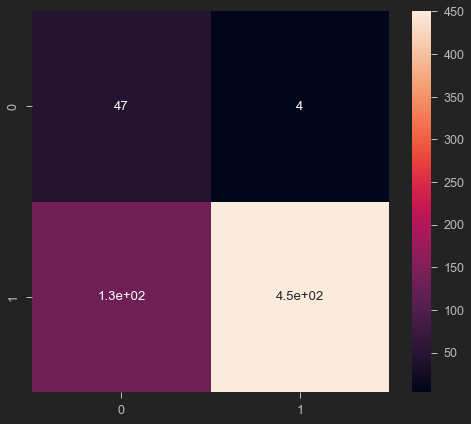

In [32]:
# Undersampling

nb.fit(X_rus, y_rus)

y_predict_test = nb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        51
           1       0.96      0.94      0.95       579

    accuracy                           0.91       630
   macro avg       0.70      0.73      0.71       630
weighted avg       0.92      0.91      0.91       630



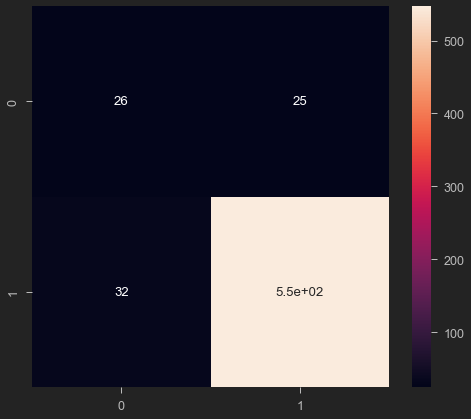

In [33]:
# Oversampling

nb.fit(X_ros, y_ros)

y_predict_test = nb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

Logistic Regression

              precision    recall  f1-score   support

           0       0.36      0.82      0.50        51
           1       0.98      0.87      0.92       579

    accuracy                           0.87       630
   macro avg       0.67      0.85      0.71       630
weighted avg       0.93      0.87      0.89       630



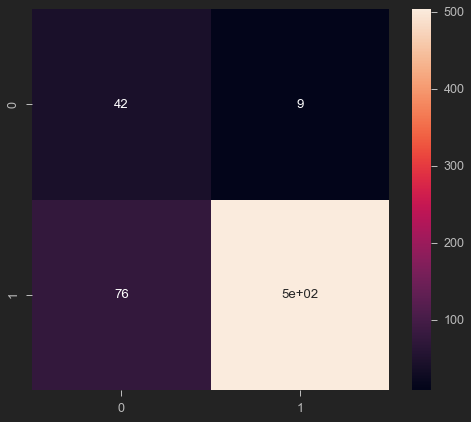

In [34]:
# Undersampling

lr.fit(X_rus, y_rus)

y_predict_test = lr.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        51
           1       0.95      0.97      0.96       579

    accuracy                           0.93       630
   macro avg       0.77      0.72      0.74       630
weighted avg       0.92      0.93      0.93       630



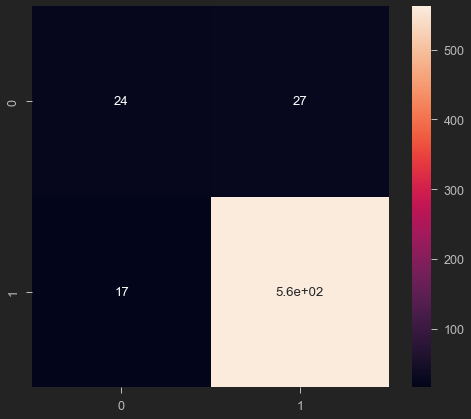

In [35]:
# Oversampling

lr.fit(X_ros, y_ros)

y_predict_test = lr.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

XGBoost

              precision    recall  f1-score   support

           0       0.21      0.90      0.35        51
           1       0.99      0.71      0.82       579

    accuracy                           0.72       630
   macro avg       0.60      0.81      0.59       630
weighted avg       0.93      0.72      0.79       630



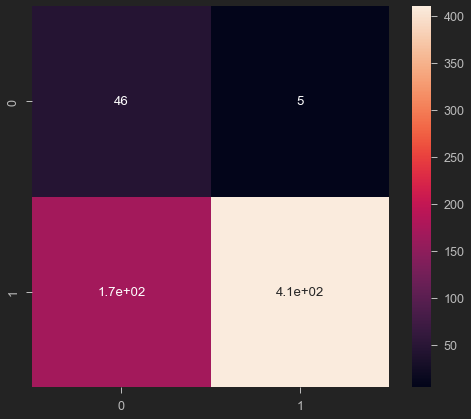

In [36]:
# Undersampling

xgb.fit(X_rus, y_rus)

y_predict_test = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.96      0.97      0.97       579

    accuracy                           0.94       630
   macro avg       0.81      0.76      0.78       630
weighted avg       0.94      0.94      0.94       630



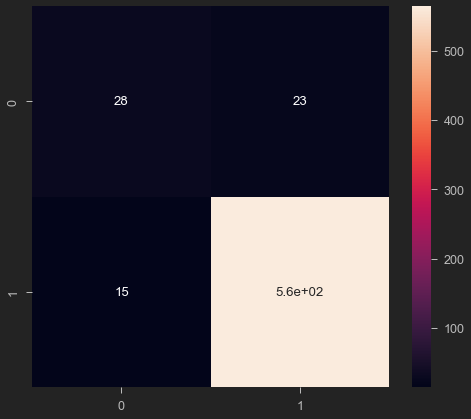

In [37]:
# Oversampling

xgb.fit(X_ros, y_ros)

y_predict_test = xgb.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))